In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
import tensorflow_datasets as tfds

Datasets=tfds.load(name='mnist')
mnist_train,mnist_test=Datasets['train'],Datasets['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


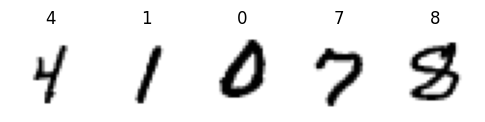

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
mnist_train=mnist_train.repeat(5).batch(32).prefetch(1)
# 32개를 가져오고 미리 한묶음을 더 가져옴.

for item in mnist_train:
	images=item['image']
	labels=item['label']

	for index in range(5):
		plt.subplot(1,5,index+1)
		image=images[index,...,0]
		label=labels[index].numpy()
		plt.imshow(image,cmap='binary')
		plt.title(label)
		plt.axis('off')
	break

In [8]:
# 입력 차원이 1개인 단순 선형 회귀

X=np.arange(1,6)
y=3*X+2

# 모델 만들기
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

# 매개변수를 인스턴스나 함수 또는 변수로 설정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.losses.MeanSquaredError(),tf.keras.losses.MeanAbsoluteError()])


In [18]:
# 훈련
history=model.fit(X,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 109.5357 - mean_squared_error: 109.5357 - mean_absolute_error: 9.7989
Epoch 2/2000
1/1 [==============================] - 0s 22ms/step - loss: 3.9120 - mean_squared_error: 3.9120 - mean_absolute_error: 1.6238
Epoch 3/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.3631 - mean_squared_error: 0.3631 - mean_absolute_error: 0.5160
Epoch 4/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.2363 - mean_squared_error: 0.2363 - mean_absolute_error: 0.4234
Epoch 5/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.2246 - mean_squared_error: 0.2246 - mean_absolute_error: 0.4048
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.2169 - mean_squared_error: 0.2169 - mean_absolute_error: 0.4001
Epoch 7/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.2096 - mean_squared_error: 0.2096 - mean_absolute_error: 0.3929
Epoch 8/2000
1/1 [=======

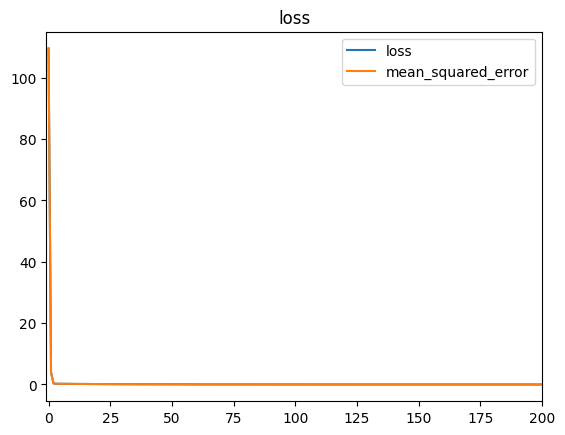

In [20]:
# 훈련 과정에서 발생하는 손실 값과 평가 지표 값 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mean_squared_error'],label='mean_squared_error')
plt.xlim(-1,200)
plt.title("loss")
plt.legend()
plt.show()

In [21]:
model.evaluate(X,y)

1/1 [==============================] - 1s 1s/step - loss: 3.0923e-12 - mean_squared_error: 3.0923e-12 - mean_absolute_error: 1.3351e-06


[3.09228207276413e-12, 3.09228207276413e-12, 1.3351440202313825e-06]

In [22]:
model.predict([10])

1/1 [==============================] - 0s 375ms/step


array([[32.000008]], dtype=float32)

# 이항 분류
- 데이터 가져오기

In [67]:
import pandas as pd
red=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
white=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

In [32]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [68]:
# 2개 데이터 합치고 타겟 만들기.
red['type']=0
white['type']=1

# 합치기
wine=pd.concat([red,white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

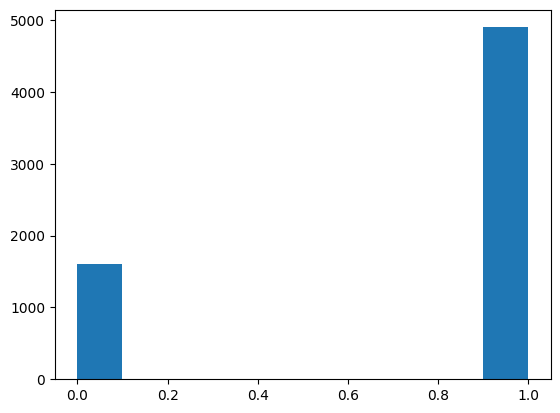

In [69]:
# 타겟의 분포 확인 .
# 분류의 경우 분포가 고르게 되어야 하고 회귀의 경우 정규 분포와 유사해야 예측이 잘 된다.
plt.hist(wine['type'])
plt.show()

In [70]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(wine)
wine_norm=scaler.transform(wine)
wine_norm = pd.DataFrame(wine_norm)

print(wine_norm)

            0         1         2         3         4         5         6   \
0     0.297521  0.413333  0.000000  0.019939  0.111296  0.034722  0.064516   
1     0.330579  0.533333  0.000000  0.030675  0.147841  0.083333  0.140553   
2     0.330579  0.453333  0.024096  0.026074  0.137874  0.048611  0.110599   
3     0.611570  0.133333  0.337349  0.019939  0.109635  0.055556  0.124424   
4     0.297521  0.413333  0.000000  0.019939  0.111296  0.034722  0.064516   
...        ...       ...       ...       ...       ...       ...       ...   
6492  0.198347  0.086667  0.174699  0.015337  0.049834  0.079861  0.198157   
6493  0.231405  0.160000  0.216867  0.113497  0.063123  0.194444  0.373272   
6494  0.223140  0.106667  0.114458  0.009202  0.053156  0.100694  0.241935   
6495  0.140496  0.140000  0.180723  0.007669  0.021595  0.065972  0.239631   
6496  0.181818  0.086667  0.228916  0.003067  0.018272  0.072917  0.211982   

            7         8         9         10        11   12  
0

In [71]:
# 데이터 샘플링
wine_shuffle=wine_norm.sample(frac=1) # 데이터를 섞어서 리턴, frac 은 데이터의 비율.1= 전체
print(wine_shuffle.head())

            0         1         2         3         4         5         6   \
2405  0.214876  0.153333  0.156627  0.193252  0.061462  0.194444  0.458525   
3571  0.314050  0.080000  0.156627  0.059816  0.127907  0.125000  0.292627   
2774  0.214876  0.113333  0.246988  0.122699  0.054817  0.194444  0.384793   
2165  0.280992  0.180000  0.204819  0.180982  0.069767  0.017361  0.071429   
1333  0.438017  0.463333  0.132530  0.024540  0.116279  0.038194  0.096774   

            7         8         9         10        11   12  
2405  0.200308  0.348837  0.106742  0.231884  0.333333  1.0  
3571  0.177174  0.333333  0.112360  0.173913  0.333333  1.0  
2774  0.181029  0.217054  0.123596  0.159420  0.333333  1.0  
2165  0.140544  0.317829  0.095506  0.507246  0.500000  1.0  
1333  0.202236  0.356589  0.162921  0.231884  0.333333  0.0  


In [72]:
# pandas 의 DF를 numpy 배열로 변환
wine_np=wine_shuffle.to_numpy()

In [73]:
# 훈련에 사용할 데이터로 생성.
train_idx=int(len(wine_np)*0.8)
train_X,train_y=wine_np[:train_idx,:-1],wine_np[:train_idx,-1] # 마지막 앞까지는 feature, 마지막은 타

test_X,test_y=wine_np[train_idx:,:-1],wine_np[train_idx:,-1]

# 레드아 화이트로 분류할 것이기 때문에 타겟을 원핫 인코딩 수행
train_y=tf.keras.utils.to_categorical(train_y,num_classes=2)
test_y=tf.keras.utils.to_categorical(test_y,num_classes=2)

print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)


(5197, 12) (1300, 12)
(5197, 2) (1300, 2)


In [74]:
# 이항 분류이고 피처의 개수가 12개.
# 첫번째 입력층의 input_shape는 (12,)
# 맨 마지막의 출력층의unit은 클래스 개수이므로 2, 다항 분류 - softmax
#중간 층들의 units는 마음대로 설정가능하지만 activation은 존재하는 이름을 사용해야 한다.

model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=48,activation='ReLU',input_shape=[12,]),
    tf.keras.layers.Dense(units=24,activation='ReLU'),
    tf.keras.layers.Dense(units=10,activation='ReLU'),
    tf.keras.layers.Dense(units=2, activation='softmax') # 다중 클래스 분류에서 마지막은 softmax

])
# 최적화 함수는 Adam, 학습률 0.03
# 손실 함수는 카테고리 크로스 엔트로피
# 평가지표는 정확도.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 48)                624       
                                                                 
 dense_20 (Dense)            (None, 24)                1176      
                                                                 
 dense_21 (Dense)            (None, 10)                250       
                                                                 
 dense_22 (Dense)            (None, 2)                 22        
                                                                 
Total params: 2072 (8.09 KB)
Trainable params: 2072 (8.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
history=model.fit(train_X,train_y,epochs=25)

Epoch 1/25
163/163 [==============================] - 2s 2ms/step - loss: 0.1154 - accuracy: 0.9565
Epoch 2/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9844
Epoch 3/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9890
Epoch 4/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9879
Epoch 5/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9908
Epoch 6/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0379 - accuracy: 0.9908
Epoch 7/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9873
Epoch 8/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9904
Epoch 9/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9913
Epoch 10/25
163/163 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9898

In [76]:
# validation_split 을 설정하면 그 비율만큼 검증 데이터로 사용해서 검증을수행
history=model.fit(train_X,train_y,epochs=25,validation_split=0.3,batch_size=64)
# batch_size는 데이터를 분할해서 학습을 수행.

Epoch 1/25
57/57 [==============================] - 0s 6ms/step - loss: 0.0231 - accuracy: 0.9948 - val_loss: 0.0251 - val_accuracy: 0.9955
Epoch 2/25
57/57 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.0275 - val_accuracy: 0.9942
Epoch 3/25
57/57 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9953 - val_loss: 0.0236 - val_accuracy: 0.9955
Epoch 4/25
57/57 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0223 - val_accuracy: 0.9955
Epoch 5/25
57/57 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9956 - val_loss: 0.0243 - val_accuracy: 0.9955
Epoch 6/25
57/57 [==============================] - 0s 5ms/step - loss: 0.0193 - accuracy: 0.9962 - val_loss: 0.0228 - val_accuracy: 0.9936
Epoch 7/25
57/57 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0248 - val_accuracy: 0.9955
Epoch 8/25
57/57 [==

In [77]:
# 평가를 위한 데이터 - test data
model.evaluate(test_X,test_y)

41/41 [==============================] - 0s 7ms/step - loss: 0.0208 - accuracy: 0.9969


[0.020799098536372185, 0.9969230890274048]

In [78]:
# model.predict([모델 속성들 12개 ]) ->

## 3개의 클래스 분류

In [79]:
print(wine['quality'].describe())
# 3~5 fmf 0, 6 을 1, 7~9를 2로 그룹

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [80]:
# 타겟 생성
wine.loc[wine['quality']<=5,'new_quality']=0
wine.loc[wine['quality']==6,'new_quality']=1
wine.loc[wine['quality']>=7,'new_quality']=2
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [94]:
# feature만 정규화
del wine['quality']

wine_backup=wine.copy() # 복제본 생성
wine_norm=(wine-wine.min())/(wine.max()-wine.min())
wine_norm['new_quality']=wine_backup['new_quality']
print(wine_norm)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.297521          0.413333     0.000000        0.019939   0.111296   
1          0.330579          0.533333     0.000000        0.030675   0.147841   
2          0.330579          0.453333     0.024096        0.026074   0.137874   
3          0.611570          0.133333     0.337349        0.019939   0.109635   
4          0.297521          0.413333     0.000000        0.019939   0.111296   
...             ...               ...          ...             ...        ...   
4893       0.198347          0.086667     0.174699        0.015337   0.049834   
4894       0.231405          0.160000     0.216867        0.113497   0.063123   
4895       0.223140          0.106667     0.114458        0.009202   0.053156   
4896       0.140496          0.140000     0.180723        0.007669   0.021595   
4897       0.181818          0.086667     0.228916        0.003067   0.018272   

      free sulfur dioxide  

(array([2384.,    0.,    0.,    0.,    0., 2836.,    0.,    0.,    0.,
        1277.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

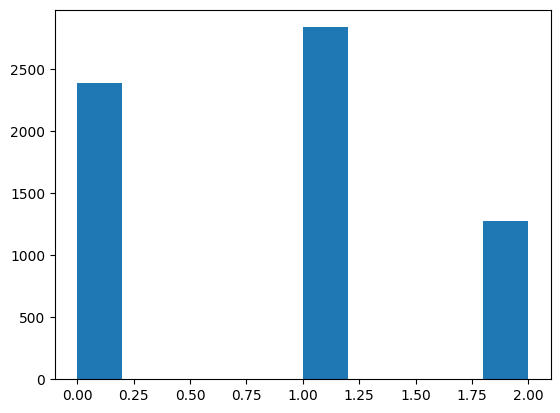

In [95]:
plt.hist(wine_norm['new_quality'])

In [93]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,2.0


In [96]:
wine_shuffle=wine_norm.sample(frac=1)
wine_np=wine_shuffle.to_numpy()
train_idx=int(len(wine_np)*0.8)
train_X,train_y=wine_np[:train_idx,:-1],wine_np[:train_idx,-1]
test_X,test_y=wine_np[train_idx:,:-1],wine_np[train_idx:,-1]

# 타겟을 원핫 인코딩 수행
train_y=tf.keras.utils.to_categorical(train_y,num_classes=3)
test_y=tf.keras.utils.to_categorical(test_y,num_classes=3)

In [97]:
train_X.shape

(5197, 12)

In [103]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='ReLU',input_shape=(12,)),
    # tf.keras.layers.Dense(units=128,activation='ReLU'),
    tf.keras.layers.Dense(units=64,activation='ReLU'),
    tf.keras.layers.Dense(units=32,activation='ReLU'),
    tf.keras.layers.Dense(units=16,activation='ReLU'),
    tf.keras.layers.Dense(units=8,activation='ReLU'),
    tf.keras.layers.Dense(units=4,activation='ReLU'),
    tf.keras.layers.Dense(units=3,activation="softmax")
])


# 평가지표는 정확도.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




history=model.fit(train_X,train_y,epochs=50,batch_size=64,validation_split=0.3)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 128)               1664      
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dense_83 (Dense)            (None, 32)                2080      
                                                                 
 dense_84 (Dense)            (None, 16)                528       
                                                                 
 dense_85 (Dense)            (None, 8)                 136       
                                                                 
 dense_86 (Dense)            (None, 4)                 36        
                                                                 
 dense_87 (Dense)            (None, 3)               

In [104]:
model.evaluate(test_X,test_y)

41/41 [==============================] - 0s 3ms/step - loss: 0.8553 - accuracy: 0.5762


[0.8552936911582947, 0.5761538743972778]